In [39]:
# In the previous model, we made the unrealistic assumption that the force of infection can be expressed as a constant rate. 
# As you have just learnt, in reality  𝜆  changes over time, depending on the number of infected people in the population. 
# This is what we are looking at in this etivity!

# Remember, the diagram for a simple SIR model looks as follows, except that now we define  𝜆  as a function of the infection rate,  𝛽  (beta), and the proportion of the population that is infectious,  𝐼/𝑁

library(deSolve)
library(reshape2)
library(ggplot2)

# Hint: one addition you need to make in this etivity is to 
# calculate the total population size N to be able to
# calculate the proportion infected for the force of infection. 
# How you do this is up to you, but one option would be 
# to calculate it within the model function where you specify
# the differential equations.

# Some assumptions inherent in this model structure are:

# a homogeneous population - everyone in the same compartment is subject to the same hazards
# a well-mixed population - all susceptible people have the same risk as getting infected, dependent on the number of infected people
# a closed population - there are no births or deaths, so the population size stays constant

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [35]:
# MODEL INPUTS:

# Vector storing the initial number of people in each compartment
# (at timestep 0)
initial_state_values <- c(S = 999999,  # the whole population we're modelling
                                       # is susceptible to infection
                          I = 1,       # the epidemic starts with 1 infected person
                          R = 0)       # there is no prior immunity in the
                                       # population

# Vector storing the parameters describing the transition rates in
# units of days^-1
parameters <- c(beta = 1,      # the infection rate
                gamma = 0.1)   # the rate of recovery, which acts on 
                               # those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 60, by = 1)   
# from 0 to 60 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order):
# time, state and parameters


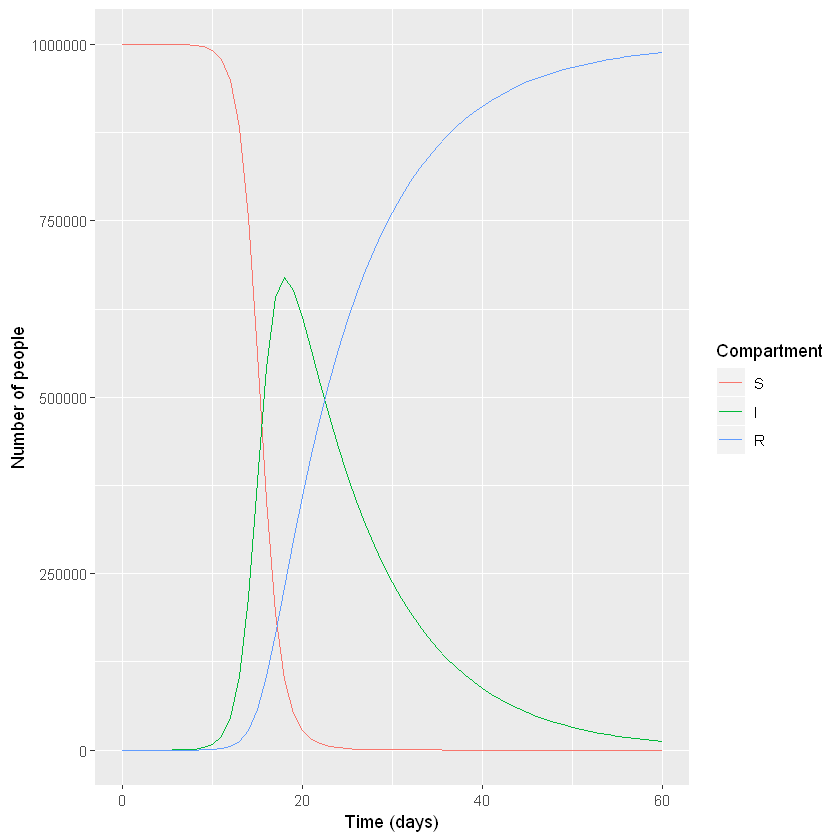

In [41]:
# Run the R code needed first
require(deSolve)

sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {  
  # tell R to look for variable names within the 
  # state and parameters objects
    
    N <- S+I+R
    
    # New: defining lambda as a function of beta and I:
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               # people move out of (-) the 
                                    # S compartment at a rate lambda 
                                    # (force of infection)
    dI <- lambda * S - gamma * I    # people move into (+) the I compartment
                                    # from S at a rate lambda, 
                                    # and move out of (-) the I compartment 
                                    # at a rate gamma (recovery)
    dR <- gamma * I                 # people move into (+) the R compartment
                                    # from I at a rate gamma
    
    # Return the number of people in the S, I and R compartments at each
    # timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
  })
  
}

output <- as.data.frame(ode(y = initial_state_values, 
                              times = times, 
                              func = sir_model,
                              parms = parameters))

# Plotting the output
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axisa
  ylab("Number of people") +                                             # add label for y axis
  labs(colour = "Compartment")                                           # add legend title




run_sir_model <- 
    function(beta, gamma, S0 = 999999, I0 = 1, R0 = 1, duration = 60) {
  
  initial_state_values <- c(S = S0,  # nearly the whole population we are 
                                     # modelling is susceptible to infection
                            I = I0,  # the epidemic starts with a single
                                     # infected person
                            R = R0)  # there is no prior immunity in the
                                     # population
  
  parameters <- c(beta = beta, # the rate of infection, 
                               
                  gamma = gamma)  # the rate of recovery, 
                                  # which acts on those infected

  times <- seq(from = 0, to = duration, by = 1) 
  

  
  # Plotting the output
  plot(x = output$time,             # time on the x axis
       y = output$S,                # the number of susceptible people at
                                      # each timestep on the y axis
       type = "l",                  # type = "l" tells R we want lines 
                                      # rather than points
       ylim = c(0,(S0+I0+R0)),      # the limits of the y axis
                                      # (from 0 to the total number of 
                                      # people)
      
      xlab = "Time (days)", 
      ylab = "Number of people")    # add axis labels
  
  lines(x = output$time,            # add the number of
        y = output$I,                 # infected people at each
        col = "red")                  # timestep on the y axis
                                                    
                                                   
  lines(x = output$time,            # number of recovered
        y = output$R,                 # people at each
        col = "blue")                 # timestep on the y axis
                                                  
  legend(x = "right",                     # add a legend on the right-hand
                                            # side of the plot
         legend = c("S", "I", "R"),       # labels S, I and R for black, 
         col = c("black", "red", "blue"),   # red, blue lines respectively
         lty = c(1,1))                    # both lines are
                                            # solid linetype (lty = 1)
  title(main = paste("beta =", beta,      # main title
                     ", gamma =", gamma))
}

In [37]:
# The peak of the epidemic occurs after 19 days, at which point around 670000 people are infected.
output[output$time == 19,]

,time,S,I,R
20,19,51602.45,651979,296418.6


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

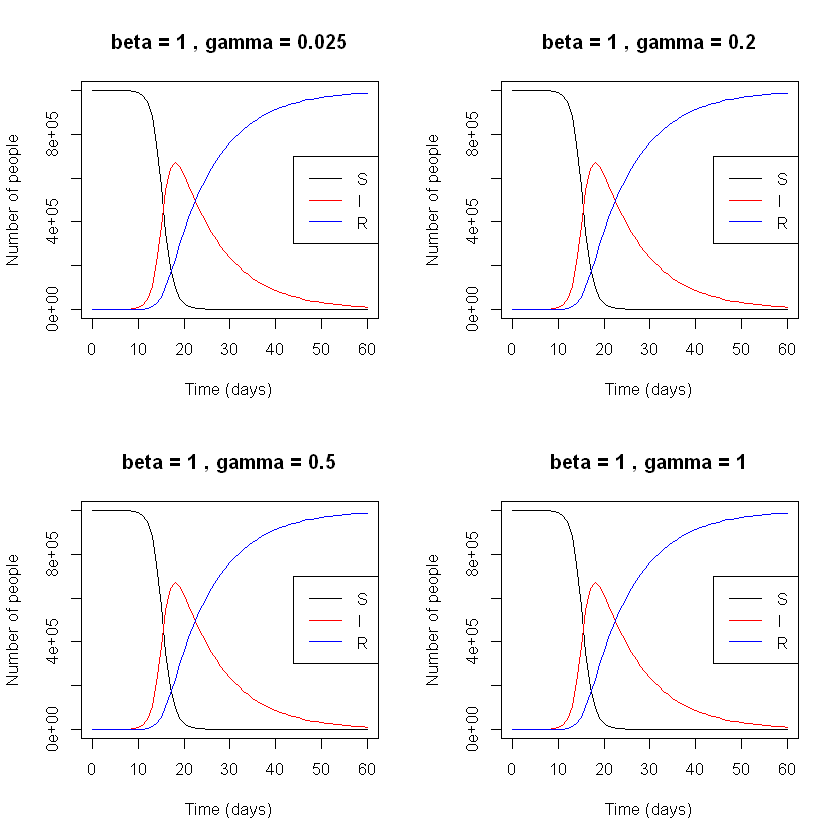

In [38]:
# With  𝛾  held constant at 0.1, an increasing value for  𝛽  leads to an earlier and higher peak of infected people. 
# With a higher  𝛽 , the peak is also "sharper", i.e. the epidemic also starts to decline again more quickly. A  𝛽  of 0.1 actually does not give rise to an epidemic: the number of susceptible, infected and recovered people stays the same as at the beginning.

par(mfrow = c(2,2))                     
run_sir_model(beta = 1, gamma = 0.025, duration = 60)
run_sir_model(beta = 1, gamma = 0.2, duration = 60)
run_sir_model(beta = 1, gamma = 0.5, duration = 60)
run_sir_model(beta = 1, gamma = 1, duration = 365)